In [107]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline


In [108]:
x_c1 = np.loadtxt('x_c1.txt',delimiter=',',dtype=float)
x_c2 = np.loadtxt('x_c2.txt',delimiter=',',dtype=float)

n_sample =20 

bias = np.ones((n_sample, 1))
x_c1 = np.hstack((bias,x_c1))
x_c2 = np.hstack((bias,x_c2))
y1 =  np.ones((len(x_c1),1))*(-1) #c1은 -1
y2 =  np.ones((len(x_c2),1)) #c2는 1
x = np.vstack((x_c1, x_c2))
y = np.vstack((y1, y2))
data = np.hstack((x,y))
w = np.random.rand(3)
n_epoch = 300
eta = 0.001
lamda = 0.01

In [109]:
def drawLine(w,col):
    x1 = np.array([-5, 10])
    m = -w[1]/w[2]
    c = -w[0]/w[2]
    x2 = m*x1 + c
    plt.plot(x1,x2,col)
def drawData(x_c1,x_c2):    
    plt.scatter(x_c1[:,1],x_c1[:,2],color = 'blue', marker = "+")
    plt.scatter(x_c2[:,1],x_c2[:,2],facecolors='none', edgecolors='r')
    plt.xlim([-5, 10])     
    plt.ylim([-5, 10])  

### Practice1

In [110]:
def Perceptron_mis_yx(y, x, w, n_epoch, eta):
    weight = [ i for i in w]
    weight = np.array(weight)
    n_sample = len(y)//2
    x_c1 = x[:n_sample]
    x_c2 = x[n_sample+1:]
    yx = y*x
    drawData(x_c1,x_c2)
    print('----- Perceptron_mis_yx() started -----')
    for i in range(1,n_epoch+1):
        yx_misclassified = [ yx[j] for j in range(n_sample*2) if np.dot(weight,yx[j]) <0]
        print('err = ', len(yx_misclassified))
        weight += sum(yx_misclassified)
        weight += eta*(sum(yx_misclassified)-2*0.001*weight)
        drawLine(weight,'k')
        if not yx_misclassified:
            break
    return i

def Perceptron_l2(y, x, w, n_epoch, eta):
    n_sample = len(y)//2
    x_c1 = x[:n_sample]
    x_c2 = x[n_sample+1:]
    weight = [ i for i in w] 
    weight = np.array(weight)
    drawData(x_c1,x_c2)
    print('----- Perceptron_l2() started -----')
    for i in range(1,n_epoch+1):
        # drawDataHyperplane(x_c1, x_c2, w, 'k')
        wx =[]
        for j in range(n_sample*2):
            temp = 0.0
            for k in range(len(weight)):
                temp+=weight[k]*x[j][k]
            wx.append(temp)
        wx = np.array(wx).reshape(n_sample*2,1)
        temp= y-wx
        diff = (temp)*(x)
        weight += eta*(sum(diff))
        err1 = 1/2*sum((temp)**2)
        err2 = 0    
        for j in range(n_sample*2):
            if y[j]*wx[j]<0:
                err2+=1
        print('err(%d) = %f %d'%(i, err1, err2))
        drawLine(weight,'k')
        if err2 == 0:
            break
    return i



----- Perceptron_mis_yx() started -----
err =  16
err =  25
err =  12
err =  11
err =  10
err =  8
err =  3
err =  3
err =  0


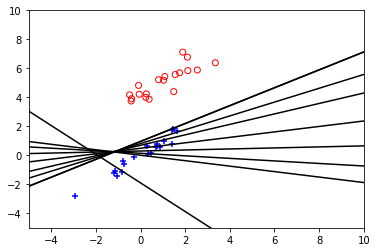

In [111]:
i= Perceptron_mis_yx(y,x,w,n_epoch,eta)

----- Perceptron_l2() started -----
err(1) = 21.291572 16
err(2) = 20.167528 16
err(3) = 19.423332 16
err(4) = 18.755324 16
err(5) = 18.118313 16
err(6) = 17.504975 15
err(7) = 16.913558 15
err(8) = 16.343150 15
err(9) = 15.792984 14
err(10) = 15.262338 13
err(11) = 14.750517 13
err(12) = 14.256852 13
err(13) = 13.780698 13
err(14) = 13.321433 13
err(15) = 12.878457 13
err(16) = 12.451191 12
err(17) = 12.039077 12
err(18) = 11.641578 12
err(19) = 11.258173 12
err(20) = 10.888363 11
err(21) = 10.531664 10
err(22) = 10.187612 10
err(23) = 9.855758 10
err(24) = 9.535668 10
err(25) = 9.226924 9
err(26) = 8.929125 6
err(27) = 8.641882 6
err(28) = 8.364820 4
err(29) = 8.097577 4
err(30) = 7.839807 3
err(31) = 7.591172 3
err(32) = 7.351348 3
err(33) = 7.120023 3
err(34) = 6.896895 3
err(35) = 6.681675 3
err(36) = 6.474080 3
err(37) = 6.273841 2
err(38) = 6.080697 2
err(39) = 5.894397 2
err(40) = 5.714697 2
err(41) = 5.541363 1
err(42) = 5.374171 0


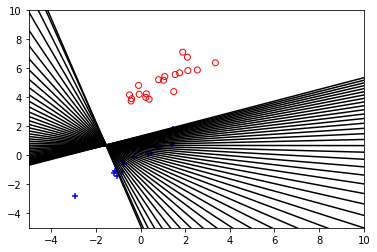

In [112]:
i= Perceptron_l2(y,x,w,n_epoch,eta)

### Practice2

In [113]:
def SVM(y, x, w, epoch, eta):
    yx = y*x
    weight = [ i for i in w]
    weight = np.array(weight)
    n_sample = len(y)//2
    x_c1 = x[:n_sample]
    x_c2 = x[n_sample+1:]
    drawData(x_c1,x_c2)
    for i in range(1,epoch+1):
        wyx= []
        err_idx = []
        err_idx_val = []
        for j in range(n_sample*2):
            wyx.append(np.dot(weight,yx[j]))
            if wyx[j] < 1:
                err_idx.append(j)
                err_idx_val.append(yx[j])
        weight = weight+ eta*(-2*lamda*weight*(n_sample*2) + sum([yx[j] for j in range(n_sample*2) if j in err_idx]))
        err1 = len(err_idx)
        err2 =sum([wyx[j] for j in range(len(wyx)) if j in err_idx])
        drawLine(weight,'k')
        print('err(%d) = %f %e, w= %f %f %f, |w|=%f, |w23|=%f'%(i, err1, err2, weight[0],weight[1],weight[2], math.sqrt(sum(weight**2)), math.sqrt(sum(weight[1:3]**2))))
    return i

err(1) = 30.000000 -3.582926e-01, w= 0.327850 0.245707 0.120781, |w|=0.427136, |w23|=0.273788
err(2) = 28.000000 -8.142655e-01, w= 0.315588 0.242902 0.151821, |w|=0.426200, |w23|=0.286446
err(3) = 26.000000 -1.741336e+00, w= 0.301335 0.239931 0.173774, |w|=0.422572, |w23|=0.296251
err(4) = 23.000000 -4.186353e+00, w= 0.284094 0.236404 0.183628, |w|=0.412693, |w23|=0.299343
err(5) = 23.000000 -3.783031e+00, w= 0.266867 0.232880 0.193474, |w|=0.403588, |w23|=0.302763
err(6) = 23.000000 -3.380032e+00, w= 0.249653 0.229359 0.203312, |w|=0.395308, |w23|=0.306498
err(7) = 23.000000 -2.977355e+00, w= 0.232454 0.225841 0.213142, |w|=0.387902, |w23|=0.310537
err(8) = 21.000000 -4.614797e+00, w= 0.215268 0.219873 0.215992, |w|=0.375948, |w23|=0.308215
err(9) = 21.000000 -4.279482e+00, w= 0.198095 0.213910 0.218841, |w|=0.364541, |w23|=0.306021
err(10) = 21.000000 -3.944435e+00, w= 0.180937 0.207951 0.221687, |w|=0.353733, |w23|=0.303955
err(11) = 21.000000 -3.609656e+00, w= 0.163792 0.201997 0.2

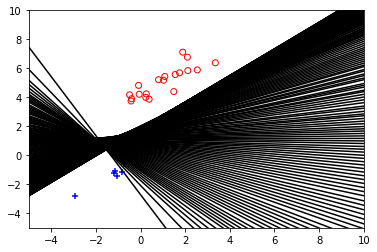

In [114]:
i = SVM(y, x, w, n_epoch, eta)